In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
cd MyDrive/My Drive/LearningSpoons_CV

/content/MyDrive/My Drive/LearningSpoons_CV


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, Reshape, multiply
from keras.models import Model

import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


width = 32
height = 32

# cifar data download
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



In [ ]:
y_train.shape

(50000, 1)

1. label 을 one-hot vector 로 변환

In [2]:
num_classes = 

In [ ]:
y_train.shape

(50000, 10)

2. list slicing 으로 train image / validation image 분리

In [ ]:
y_train.shape

(50000, 10)

2-1. resNet18 모듈 구현

In [4]:
def Residual_Block(x, filter):

    x_skip = x 
    f= filter  # 초기의 x
     #scale


    #skip connection
    
    return x


2-2. resNet 50 모듈 구현

In [5]:
def Residual_Block_50(x, filters):
    f1, f2 = filters
    x_skip = x # 초기의 x

    
    #scale

    #skip connection
    
    return x

https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/resnet.py

3. resNet 모델 구현

In [ ]:

inputs = Input(shape=(32,32,3))
x = Conv2D(64, kernel_size=7, strides=2, padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

#2-1 resNet 18

#2-2 resNet 50


x = GlobalAveragePooling2D()(x) 
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

4. ImageDagaGenerator 로 normalization 및 augmentation 적용 (shear , zoom , horizontal flip 적용 )



In [7]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


5. batch 32, epoch 10 으로 학습

In [ ]:
history = model.fit()

6. train data, validation data 각각에 대해 마지막 layer의 loss 와 accuracy

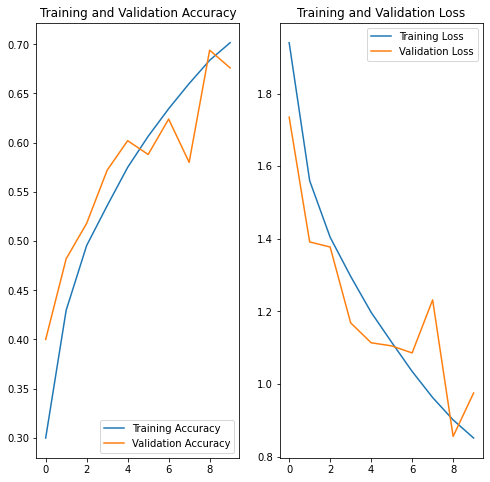

In [9]:
import matplotlib.pyplot as plt

acc = 
val_acc = 

loss =
val_loss = 

epochs_range = range(10)


# accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(  label='Training Accuracy')
plt.plot(  label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# loss
plt.subplot(1, 2, 2)
plt.plot(  label='Training Loss')
plt.plot(   label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()